# Para refrescar la memoria


[What Is Statistics: Crash Course Statistics #1](https://www.youtube.com/watch?v=sxQaBpKfDRk&list=PLH2l6uzC4UEW3iJO4T0qUeUEp_X-f1U7S&index=2)

[Mathematical Thinking: Crash Course Statistics #2](https://www.youtube.com/watch?v=tN9Xl1AcSv8&list=PLH2l6uzC4UEW3iJO4T0qUeUEp_X-f1U7S&index=3)

[Regression: Crash Course Statistics #32](https://www.youtube.com/watch?v=WWqE7YHR4Jc&t=517s)

[Supervised Machine Learning: Crash Course Statistics #36](https://www.youtube.com/watch?v=jmLid2x9eKg&list=PLH2l6uzC4UEW3iJO4T0qUeUEp_X-f1U7S&index=37)

# Train y Test

Ahora, separemos nuestros datos en train y test. Como estamos en el mundo **i.i.d** y no series de tiempo o panel. Podemos elegir el train y test de manera completamente aleatoria.

In [ ]:
from sklearn.model_selection import train_test_split

def test_regresion(X,Y):

    # Train y Test
    X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)


    # ### Regresion lineal
    regresion = linear_model.LinearRegression()
    # Entrenamiento
    regresion.fit(X_train,Y_train)
    # Predicciones
    Y_hat = regresion.predict(X_test)
    Y_hat_train = regresion.predict(X_train)
    # Error
    error_test = np.sqrt(np.square(np.subtract(Y_hat,Y_test)))
    error_train = np.sqrt(np.square(np.subtract(Y_hat_train,Y_train)))
    df = pd.DataFrame(data={'Y_hat':Y_hat, 'Y':Y_test})

    # ## Plots
    X_plot = np.linspace(Y_test.min(), Y_test.max(), 100)
    Y_plot = X_plot
    g = sns.FacetGrid(df, height = 6)
    g = g.map(plt.scatter, "Y", "Y_hat", edgecolor="w")
    plt.plot(X_plot, Y_plot, color='r')
    plt.show()

    print(f'Train RMSE de prediccion {error_test.mean()}')
    print(f'Test RMSE de prediccion {error_train.mean()}')
    print(f'Los coeficientes de la regresion: {regresion.coef_}')
    print(f'Intercepto: {regresion.intercept_}')

$y = x + 5x^2 + 6x^3 + x^4\epsilon$

> Indented block



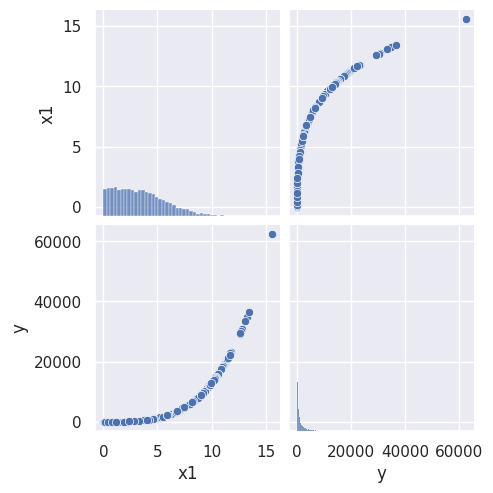

In [ ]:
# Semilla para replicacion de resultados
np.random.seed(58)
N = 10000
# Matriz de Diseño
X = np.random.normal(3,3,size=(N,1))
eps = np.random.normal(3,2)
X = np.abs(X)
# Simulacion de Y
Y = Y = X + 5*np.power(X,2) + 6*np.power(X,3) + np.power(X,4)*eps
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

Utilicemos la regresion sin alterar nada

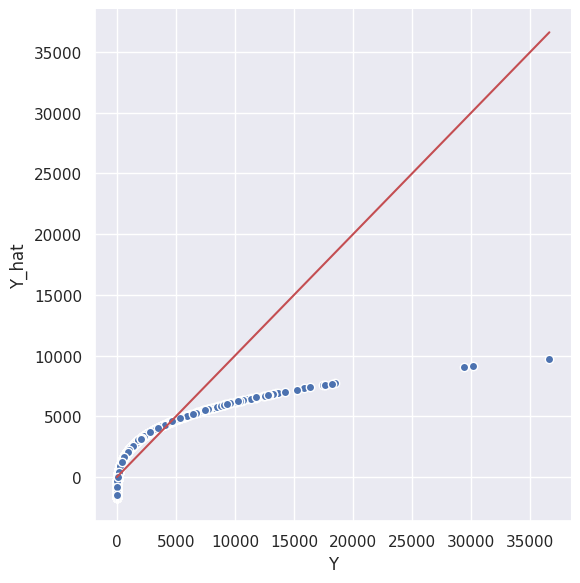

Train RMSE de prediccion 985.1100969154054
Test RMSE de prediccion 975.6455964002057
Los coeficientes de la regresion: [852.56692198]
Intercepto: -1718.6703375742961


In [ ]:
test_regresion(X,Y)

Utilicemos el grado de polinomio correcto

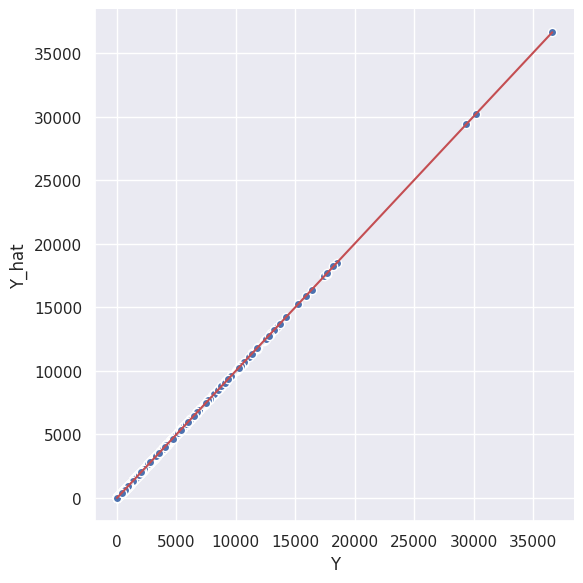

Train RMSE de prediccion 1.4427082074407616e-11
Test RMSE de prediccion 1.3964203101450037e-11
Los coeficientes de la regresion: [1.         5.         6.         0.65243876]
Intercepto: 1.3869794202037156e-11


In [ ]:
X2 = X.copy()

#Ingenieria de Variables
power = [2,3,4]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)

test_regresion(X2,Y)

Ahora usemos un polinomio muy grande representado por: `power = [n for n in range(1,100)]
`

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


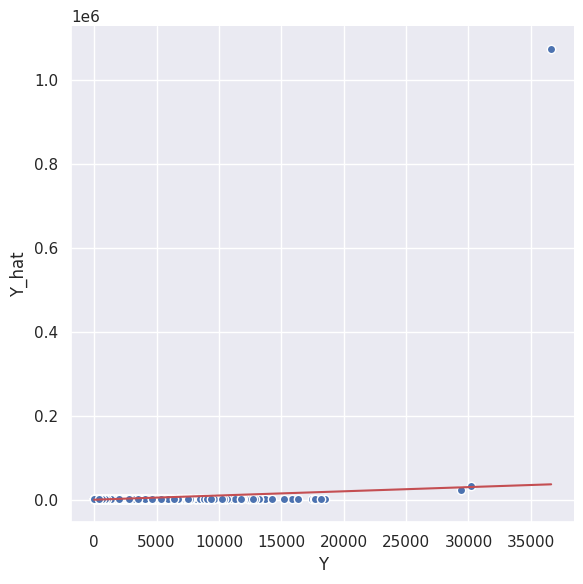

Train RMSE de prediccion 1952.1020264138842
Test RMSE de prediccion 1413.49469769702
Los coeficientes de la regresion: [ 2.98383479e-100 -9.93006342e-100 -6.14414389e-109  3.75253735e-112
 -1.62428278e-114  0.00000000e+000 -1.17041293e-193 -1.02911220e-192
 -9.14789622e-192 -8.13982228e-191 -7.16254133e-190 -6.12537920e-189
 -4.94009432e-188 -3.51237121e-187 -1.73446049e-186  5.22063937e-186
  3.41416759e-184  7.13644823e-183  1.19320427e-181  1.81059718e-180
  2.60416380e-179  3.62213297e-178  4.92517663e-177  6.58959576e-176
  8.71129446e-175  1.14107359e-173  1.48391198e-172  1.91860761e-171
  2.46892420e-170  3.16461694e-169  4.04291198e-168  5.15034264e-167
  6.54502614e-166  8.29948337e-165  1.05041274e-163  1.32715742e-162
  1.67419622e-161  2.10895090e-160  2.65305810e-159  3.33336102e-158
  4.18312628e-157  5.24353447e-156  6.56550288e-155  8.21191001e-154
  1.02603052e-152  1.28062014e-151  1.59670685e-150  1.98871619e-149
  2.47433478e-148  3.07521065e-147  3.81779290e-146  

In [ ]:
X3 = X.copy()

#Ingenieria de Variables
power = [n for n in range(1,100)]
print(power)
for p in power:
    X3 = np.concatenate((X3,np.power(X[:,0],p).reshape((N,1))), axis=1)

test_regresion(X3,Y)